## **10장 자연어 처리를 위한 임베딩 - Part 1**

### 10.1.1 희소 표현 기반 임베딩

In [ ]:
from google.colab import files # 데이터 불러오기
file_uploaded=files.upload()   # chap10/data/class2.csv 데이터 불러오기

Saving class2.csv to class2.csv


In [ ]:
# 10-1 원-핫 인코딩 적용
import pandas as pd
import torch
class2 = pd.read_csv("class2.csv")

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
onehot_encoder = preprocessing.OneHotEncoder()

train_x = label_encoder.fit_transform(class2['class2'])
train_x

array([2, 2, 1, 0, 1, 0])

### 10.1.2 횟수 기반 임베딩

- 카운터 벡터

In [ ]:
# 10-2 코퍼스에 카운터 벡터 적용
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the last chance.',
    'and if you do not have this chance.',
    'you will never get any chance.',
    'will you do get this one?',
    'please, get this chance.',
]
vect = CountVectorizer()
vect.fit(corpus)
vect.vocabulary_

{'this': 14,
 'is': 7,
 'the': 13,
 'last': 8,
 'chance': 2,
 'and': 0,
 'if': 6,
 'you': 16,
 'do': 3,
 'not': 10,
 'have': 5,
 'will': 15,
 'never': 9,
 'get': 4,
 'any': 1,
 'one': 11,
 'please': 12}

In [ ]:
# 10-3 배열 변환
vect.transform(['you will never get any chance.']).toarray()

array([[0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1]])

In [ ]:
# 10-4 불용어를 제거한 카운터 벡터
vect = CountVectorizer(stop_words=['and', 'is', 'please', 'this']).fit(corpus)
# stop_words 사용하여 is, not, an 같은 불용어 제거
vect.vocabulary_

{'the': 10,
 'last': 6,
 'chance': 1,
 'if': 5,
 'you': 12,
 'do': 2,
 'not': 8,
 'have': 4,
 'will': 11,
 'never': 7,
 'get': 3,
 'any': 0,
 'one': 9}

- TF-IDF

In [ ]:
# 10-5 TF-IDF 적용한 후 행렬로 표현
from sklearn.feature_extraction.text import TfidfVectorizer

doc = ['I like machine learning', 'I love deep learning', 'I run everyday']
tfidf_vectorizer = TfidfVectorizer(min_df=1)
tfidf_matrix = tfidf_vectorizer.fit_transform(doc)
doc_distance = (tfidf_matrix * tfidf_matrix.T)
print('유사도를 위한', str(doc_distance.get_shape()[0]), 'x', str(doc_distance.get_shape()[1]), '행렬을 만들었습니다.')
print(doc_distance.toarray())

유사도를 위한 3 x 3 행렬을 만들었습니다.
[[1.       0.224325 0.      ]
 [0.224325 1.       0.      ]
 [0.       0.       1.      ]]


### 10.1.3 예측 기반 임베딩

- 워드투벡터

In [ ]:
from google.colab import files # 데이터 불러오기
file_uploaded=files.upload()   # chap10/data/peter.txt 데이터 불러오기

Saving peter.txt to peter.txt


In [ ]:
# 10-6 데이터셋을 메모리로 로딩하고 토큰화 적용
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
warnings.filterwarnings(action='ignore')
import gensim
from gensim.models import Word2Vec
import nltk

nltk.download('punkt_tab')  # Download the 'punkt_tab' resource

sample = open("peter.txt", "r", encoding='UTF8')  # 피터팬 데이터셋 로딩
s = sample.read()

f = s.replace("\n", " ")  # 줄바꿈(\n)을 " "(공백)으로 변환
data = []

for i in sent_tokenize(f):   # 로딩한 파일의 각 문장마다 반복
    temp = []
    for j in word_tokenize(i):  # 문장을 단어로 토큰화
        temp.append(j.lower())  # 토큰화된 단어를 소문자로 변환하여 temp에 저장
    data.append(temp)

data

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


[['once',
  'upon',
  'a',
  'time',
  'in',
  'london',
  ',',
  'the',
  'darlings',
  'went',
  'out',
  'to',
  'a',
  'dinner',
  'party',
  'leaving',
  'their',
  'three',
  'children',
  'wendy',
  ',',
  'jhon',
  ',',
  'and',
  'michael',
  'at',
  'home',
  '.'],
 ['after',
  'wendy',
  'had',
  'tucked',
  'her',
  'younger',
  'brothers',
  'jhon',
  'and',
  'michael',
  'to',
  'bed',
  ',',
  'she',
  'went',
  'to',
  'read',
  'a',
  'book',
  '.'],
 ['she', 'heard', 'a', 'boy', 'sobbing', 'outside', 'her', 'window', '.'],
 ['he', 'was', 'flying', '.'],
 ['there', 'was', 'little', 'fairy', 'fluttering', 'around', 'him', '.'],
 ['wendy', 'opened', 'the', 'window', 'to', 'talk', 'to', 'him', '.'],
 ['“', 'hello', '!'],
 ['who', 'are', 'you', '?'],
 ['why', 'are', 'you', 'crying', '”', ',', 'wendy', 'asked', 'him', '.'],
 ['“', 'my', 'name', 'is', 'peter', 'pan', '.'],
 ['my',
  'shadow',
  'wouldn',
  '’',
  't',
  'stock',
  'to',
  'me.',
  '”',
  ',',
  'he',
  'rep

- CBOW

In [ ]:
# 10-7 데이터셋에 CBOW 적용 후 'peter'와 'wendy'의 유사성 확인
model1 = gensim.models.Word2Vec(data, min_count=1,
                                vector_size=100, window=5, sg=0)  # 1
print("Cosine similarity between 'peter' " +
      "'wendy' - CBOW : ",
      model1.wv.similarity('peter', 'wendy'))  # 결과 출력

Cosine similarity between 'peter' 'wendy' - CBOW :  0.074393824


In [ ]:
# 10-8 'peter'와 'hook' 유사성 확인
print("Cosine similarity between 'peter' " +
      "'hook' - CBOW : ",
      model1.wv.similarity('peter', 'hook'))

Cosine similarity between 'peter' 'hook' - CBOW :  0.027709836


- skip-gram

In [ ]:
# 10-9 데이터셋에 skip-gram 적용 후 'peter'와 'wendy'의 유사성 확인
model2 = gensim.models.Word2Vec(data, min_count=1, vector_size=100,
                                window=5, sg=1)  # skip-gram 모델 사용
print("Cosine similarity between 'peter' "+
      "'wendy' - Skip Gram : ",
      model2.wv.similarity('peter', 'wendy'))  # 결과 출력

Cosine similarity between 'peter' 'wendy' - Skip Gram :  0.40088683


In [ ]:
# 10-10 'peter'와 'hook'의 유사성
print("Cosine similarity between 'peter' "+
      "'hook' - Skip Gram : ",
      model2.wv.similarity('peter', 'hook'))

Cosine similarity between 'peter' 'hook' - Skip Gram :  0.5201673


- 패스트텍스트

In [ ]:
#코랩에서 교재와 같이 실행하면 다음과 같은 오류가 발생합니다.
# all ngrams for word peter absent from model
# 어떤 ngram도 'perter', 'wendy'라는 단어가 존재하지 않는다는 의미인데,
# 단어가 존재함에도 찾지 못하여 예제를 조금 바꾸었습니다.

In [ ]:
# 10-11 라이브러리 및 데이터 호출
import gensim
from gensim.models.fasttext import FastText as ft_gensim

stemmed = ['database', 'science', 'scientist', 'mgmt', 'microsoft', 'hire', 'develop', 'mentor', 'team', 'data', 'scientist', 'define', 'dataloader', 'scienc', 'priority', 'deep', 'understand', 'learn', 'goal', 'collabor', 'across', 'triple', 'group', 'set', 'team', 'shortterm', 'longterm', 'goal', 'act', 'strait', 'advisor', 'leadership', 'influenc', 'future', 'direct', 'strategy', 'define', 'partnership', 'align', 'effect', 'broad', 'analyt', 'effort', 'analyticsdata', 'team', 'drive', 'part', 'datadog', 'scienc', 'bi', 'common', 'disciplin', 'microsoftprior', 'experi', 'hire', 'manage', 'runner', 'team', 'data', 'scientist', 'busi', 'domain', 'experi', 'usage', 'analyt', 'must', 'experi', 'across', 'sever', 'relev', 'busi', 'domain', 'util', 'critic', 'think', 'skill', 'concept', 'complex', 'busi', 'problem', 'salt', 'use', 'advanc', 'analsis', 'large', 'scale', 'realworld', 'busi', 'data', 'set', 'candid', 'must', 'abl', 'independ', 'execut', 'analyt', 'project', 'help', 'intern', 'client', 'understand']

model = ft_gensim(vector_size=100, window=5, min_count=1, workers=4, sg=1)
model.build_vocab(corpus_iterable=[stemmed])

model.train(corpus_iterable=[stemmed], total_examples=model.corpus_count, epochs=model.epochs)
# model.wv.similarity('data', 'scientist')
model.wv.most_similar(positive=['scientist'])

[('scienc', 0.35739946365356445),
 ('science', 0.2760446071624756),
 ('think', 0.217257559299469),
 ('client', 0.19491459429264069),
 ('part', 0.19050131738185883),
 ('util', 0.18476800620555878),
 ('analsis', 0.1737504005432129),
 ('intern', 0.15601569414138794),
 ('domain', 0.15585266053676605),
 ('group', 0.14942587912082672)]

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# 10-14 라이브러리와 사전 훈련된 모델 호출
from gensim.models import KeyedVectors

model_kr = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/Colab Notebooks/DLData/wiki.ko.vec')

In [ ]:
from __future__ import print_function
from gensim.models import KeyedVectors
# gensim은 자연어를 벡터로 변환하는 데 필요한 편의 기능 제공하는 라이브러리

In [ ]:
# 10-15 '노력'과 유사한 단어와 유사도 확인
fine_similat_to = '노력'

for similar_word in model_kr.similar_by_word(fine_similat_to):
    print("Word: {0}, Similarity: {1:.2f}". format(
        similar_word[0], similar_word[1]
    ))

Word: 노력함, Similarity: 0.80
Word: 노력중, Similarity: 0.75
Word: 노력만, Similarity: 0.72
Word: 노력과, Similarity: 0.71
Word: 노력의, Similarity: 0.69
Word: 노력가, Similarity: 0.69
Word: 노력이나, Similarity: 0.69
Word: 노력없이, Similarity: 0.68
Word: 노력맨, Similarity: 0.68
Word: 노력보다는, Similarity: 0.68


In [ ]:
# 10-16 '동물', '육식동물'에는 긍정적이지만 '사람'에는 부정적인 단어와 유사도 확인
similarities = model_kr.most_similar(positive=['동물', '육식동물'],
                                     negative=['사람'])
print(similarities)

[('초식동물', 0.7804122567176819), ('거대동물', 0.7547270655632019), ('육식동물의', 0.7547166347503662), ('유두동물', 0.753511369228363), ('반추동물', 0.7470757961273193), ('독동물', 0.7466291785240173), ('육상동물', 0.746031641960144), ('유즐동물', 0.7450903654098511), ('극피동물', 0.7449344396591187), ('복모동물', 0.742434561252594)]


### 10.1.4 횟수/예측 기반 임베딩

- 글로브

In [ ]:
# 10-17 라이브러리 호출 및 데이터셋 로딩
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

glove_file = datapath('/content/drive/MyDrive/Colab Notebooks/DLData/glove.6B.100d.txt') # 1
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
# 글로브 데이터를 워드투벡터 형태로 변환
glove2word2vec(glove_file, word2vec_glove_file)  # 2

<ipython-input-14-5b8b4febe016>:14: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_file, word2vec_glove_file)  # 2


(400000, 100)

In [ ]:
# 10-18 'bill'과 유사한 단어의 리스트 반환
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)
# load_word2vec_format() 메서드 이용하여 word2vec.c형식으로 벡터 가져옴.
model.most_similar('bill')
# 단어(bill) 기준으로 가장 유사한 단어들의 리스트 보여줌.

[('legislation', 0.8072139620780945),
 ('proposal', 0.730686366558075),
 ('senate', 0.7142541408538818),
 ('bills', 0.704440176486969),
 ('measure', 0.6958035230636597),
 ('passed', 0.690624475479126),
 ('amendment', 0.6846879720687866),
 ('provision', 0.6845567226409912),
 ('plan', 0.6816462874412537),
 ('clinton', 0.6663140058517456)]

In [ ]:
# 10-19 'cherry'와 유사한 단어의 리스트 반환
model.most_similar('cherry')
# 단어(cherry) 기준으로 가장 유사한 단어들의 리스트 보여 줌.

[('peach', 0.688809871673584),
 ('mango', 0.683819055557251),
 ('plum', 0.6684104204177856),
 ('berry', 0.6590359210968018),
 ('grove', 0.658155083656311),
 ('blossom', 0.6503506302833557),
 ('raspberry', 0.6477391719818115),
 ('strawberry', 0.6442098021507263),
 ('pine', 0.6390928626060486),
 ('almond', 0.6379212737083435)]

In [ ]:
# 10-20 'cherry'와 관련성이 없는 단어의 리스트 반환
model.most_similar(negative=['cherry'])
# 단어(cherry)와 관련성이 없는 단어들을 반환

[('kazushige', 0.48343509435653687),
 ('askerov', 0.4778185784816742),
 ('lakpa', 0.46915265917778015),
 ('ex-gay', 0.4571332633495331),
 ('tadayoshi', 0.4522107243537903),
 ('turani', 0.44810065627098083),
 ('saglam', 0.4469599425792694),
 ('aijun', 0.4435270130634308),
 ('adjustors', 0.44235292077064514),
 ('nyum', 0.4423118233680725)]

In [ ]:
# 10-21 'woman', 'king'과 유사성이 높으면서 'man'과 관련성이 없는 단어 반환
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
# woman, king과 유사성이 높으면서 man과 관련성이 없는 단어 반환
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


In [ ]:
# 10-22 'australia', 'beer', 'france'와 관련성이 있는 단어를 반환
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]
analogy('australia', 'beer', 'france')

'champagne'

In [ ]:
# 10-23 'tall', 'tallest', 'long' 단어를 기반으로 새로운 단어 유추
analogy('tall', 'tallest', 'long')

'longest'

In [ ]:
# 10-24 'breakfast cereal dinner lunch' 중 유사도가 낮은 단어 반환
print(model.doesnt_match("breakfast cereal dinner lunch".split()))
# 유사도가 가장 낮은 단어 반환

cereal


### 10.2.1 seq2seq

In [ ]:
# 10-25 라이브러리 호출
from __future__ import unicode_literals, print_function, division  # 1
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import numpy as np
import pandas as pd

import os
import re  # 2
import random

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
import re
com = re.compile("[cats]")
com.findall('I love cats.')

['c', 'a', 't', 's']

In [ ]:
# 10-26 데이터 준비
SOS_token = 0
EOS_token = 1
MAX_LENGTH = 20

class Lang:  # 딕셔너리 만들기 위한 클래스
    def __init__(self):  # 단어 인덱스를 저장하기 위한 컨테이너 초기화
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS"}
        # SOS(Start Of Sequence): 문장의 시작,
        # EOS(End Of Sequence): 문장의 끝
        self.n_words = 2 # SOS와 EOS에 대한 카운트

    def addSentence(self, sentence):  # 문장을 단어 단위로 분리한 후 컨테이너(word)에 추가
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):  # 컨테이너에 단어가 없다면 추가, 있다면 카운트 업데이트
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

In [ ]:
# 10-27 데이터 정규화
def normalizeString(df, lang):
    sentence = df[lang].str.lower()  # 소문자로 변환
    sentence = sentence.str.replace('[A-Za-z\s]+', " ")
    # a-z, A-Z, ..., ?, ! 등을 제외하고 모두 공백으로 바꿈
    sentence = sentence.str.normalize('NFD')  # 유니코드 정규화 방식
    sentence = sentence.str.encode('ascii', errors = 'ignore').str.decode('utf-8')
    # Unicode를 ASCII로 전환
    return sentence

def read_sentence(df, lang1, lang2):
    sentence1 = normalizeString(df, lang1)  # 데이터셋의 첫 번째 열(영어)
    sentence2 = normalizeString(df, lang2)  # 데이터셋의 두 번째 열(프랑스어)
    return sentence1, sentence2

def read_file(loc, lang1, lang2):
    df = pd.read_csv(loc, delimiter='\t', header=None, names=[lang1, lang2])  # 1
    return df

def process_data(lang1, lang2):
    df = read_file('/content/drive/MyDrive/Colab Notebooks/DLData/eng-fra.txt', lang1, lang2) #구글 드라이브에서 파일 경로 복사 후 붙여넣으세요.
    # 데이터셋 불러오기
    sentence1, sentence2 = read_sentence(df, lang1, lang2)

    input_lang = Lang()
    output_lang = Lang()
    pairs = []
    for i in range(len(df)):
        if len(sentence1[i].split(' ')) < MAX_LENGTH and len(sentence2[i].split(' ')) < MAX_LENGTH:
            full = [sentence1[i], sentence2[i]]
            # 첫 번째와 두 번쨰 열을 합쳐서 저장
            input_lang.addSentence(sentence1[i])
            # 입력(input)으로 영어 사용
            output_lang.addSentence(sentence2[i])
            # 출력(output)으로 프랑스어 사용
            pairs.append(full)
            # pairs에는 입력과 출력이 합쳐진 것 사용

    return input_lang, output_lang, pairs

In [ ]:
# 10-28 텐서로 변환
def indexesFromSentence(lang, sentence):  # 문장을 단어로 분리하고 인덱스 반환
    return [lang.word2index[word] for word in sentence.split(' ')]

def tensorFromSentence(lang, sentence):
    # 딕셔너리에서 단어에 대한 인덱스 가져오고 문장 끝에 토큰 추가
    indexes = indexesFromSentence(lang, sentence)
    indexes.append(EOS_token)
    return torch.tensor(indexes, dtype=torch.long, device=device).view(-1, 1)

def tensorsFromPair(input_lang, output_lang, pair):
    # 입력과 출력 문장을 텐서로 변환하여 반환
    input_tensor = tensorFromSentence(input_lang, pair[0])
    target_tensor = tensorFromSentence(output_lang, pair[1])
    return (input_tensor, target_tensor)

In [ ]:
# 10-29 인코더 네트워크
class Encoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, embbed_dim, num_layers):
        super(Encoder, self).__init__()
        self.input_dim = input_dim  # 인코더에서 사용할 입력층
        self.embbed_dim = embbed_dim # 인코더에서 사용할 임베딩 계층
        self.hidden_dim = hidden_dim  # 인코더에서 사용할 은닉층(이전 은닉층)
        self.num_layers = num_layers # 인코더에서 사용할 GRU의 계층 개수
        self.embedding = nn.Embedding(input_dim, self.embbed_dim) # 임베딩 계층 초기화
        self.gru = nn.GRU(self.embbed_dim, self.hidden_dim, num_layers=self.num_layers)
        # 임베딩 차원, 은닉층 차원, GRU 계층 개수 이용하여 GRU 계층 초기화

    def forward(self, src):
        embedded = self.embedding(src).view(1, 1, -1)  # 임베딩 처리
        outputs, hidden = self.gru(embedded)  # 임베딩 결과를 GRU 모델에 적용
        return outputs, hidden

In [ ]:
# 10-30 디코더 네트워크
class Decoder(nn.Module):
    def __init__(self, output_dim, hidden_dim, embbed_dim, num_layers):
        super(Decoder, self).__init__()

        self.embbed_dim = embbed_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.num_layers = num_layers

        self.embedding = nn.Embedding(output_dim, self.embbed_dim) # 임베딩 계층 초기화
        self.gru = nn.GRU(self.embbed_dim, self.hidden_dim, num_layers=self.num_layers)
        # GRU 계층 초기화
        self.out = nn.Linear(self.hidden_dim, output_dim)  # 선형 계층 초기화
        self.softmax = nn.LogSoftmax(dim=1)  # 1

    def forward(self, input, hidden):
        input = input.view(1, -1)  # 입력을 (1, 배치 크기)로 변경
        embedded = F.relu(self.embedding(input))
        output, hidden = self.gru(embedded, hidden)
        prediction = self.softmax(self.out(output[0]))
        return prediction, hidden

In [ ]:
# 10-31 seq2seq 네트워크
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device, MAX_LENGTH=MAX_LENGTH):
        super().__init__()

        self.encoder = encoder  # 인코더 초기화
        self.decoder = decoder  # 디코더 초기화
        self.device = device

    def forward(self, input_lang, output_lang, teacher_forcing_ratio=0.5):
        input_length = input_lang.size(0)  # 입력 문자 길이(문장 단어 수)
        batch_size = output_lang.shape[1]
        target_length = output_lang.shape[0]
        vocab_size = self.decoder.output_dim
        outputs = torch.zeros(target_length, batch_size, vocab_size).to(self.device)
        # 예측된 출력을 저장하기 위한 변수 초기화

        for i in range(input_length):
            encoder_output, encoder_hidden = self.encoder(input_lang[i])
            # 문장 모든 단어를 인코딩
        decoder_hidden = encoder_hidden.to(device)
        decoder_input = torch.tensor([SOS_token], device=device)

        for t in range(target_length):
            decoder_output, decoder_hidden = self.decoder(decoder_input, decoder_hidden)
            outputs[t] = decoder_output
            teacher_force = random.random() < teacher_forcing_ratio
            topv, topi = decoder_output.topk(1)
            input = (output_lang[t] if teacher_force else topi)
            if(teacher_force == False and input.item() == EOS_token):
                break
        return outputs

In [ ]:
# 10-32 모델의 오차 계산 함수 정의
teacher_forcing_ratio = 0.5

def Model(model, input_tensor, target_tensor, model_optimizer, criterion):
    model_optimizer.zero_grad()
    input_length = input_tensor.size(0)
    loss = 0
    epoch_loss = 0
    output = model(input_tensor, target_tensor)
    num_iter = output.size(0)

    for ot in range(num_iter):
        loss += criterion(output[ot], target_tensor[ot])
        # 모델의 예측 결과와 정답(예상 결과) 이용하여 오차 계산

    loss.backward()
    model_optimizer.step()
    epoch_loss = loss.item() / num_iter
    return epoch_loss

In [ ]:
# 10-33 모델 훈련 함수 정의
def trainModel(model, input_lang, output_lang, pairs, num_iteration=20000):
    model.train()
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    # 옵티마이저로 SGD 사용
    criterion = nn.NLLLoss()  # 1
    total_loss_iterations = 0

    training_pairs = [tensorsFromPair(input_lang, output_lang, random.choice(pairs))
                      for i in range(num_iteration)]

    for iter in range(1, num_iteration + 1):
        training_pair = training_pairs[iter - 1]
        input_tensor = training_pair[0]
        target_tensor = training_pair[1]
        loss = Model(model, input_tensor, target_tensor, optimizer, criterion)
        # Model 객체 이용하여 오차 계산
        total_loss_iterations += loss

        if iter % 5000 == 0:
            average_loss = total_loss_iterations / 5000
            total_loss_iterations = 0
            print('%d %.4f' % (iter, average_loss))

    torch.save(model.state_dict(), '/content/drive/MyDrive/Colab Notebooks/DLData/mytraining.pt')
    return model

In [ ]:
# 10-34 모델 평가
def evaluate(model, input_lang, output_lang, sentences, max_length=MAX_LENGTH):
    with torch.no_grad():
        input_tensor = tensorFromSentence(input_lang, sentences[0])
        # 입력 문자열 텐서로 변환
        output_tensor = tensorFromSentence(output_lang, sentences[1])
        # 출력 문자열을 텐서로 변환
        decoded_words = []
        output = model(input_tensor, output_tensor)

        for ot in range(output.size(0)):
            topv, topi = output[ot].topk(1)
            # 각 출력에서 가장 높은 값을 찾아 인덱스 반환

            if topi[0].item() == EOS_token:
                decoded_words.append('<EOS>')
                # EOS 토큰을 만나면 평가 멈춤.
                break
            else:
                decoded_words.append(output_lang.index2word[topi[0].item()])
                # 예측 결과를 출력 문자열에 추가
    return decoded_words

def evaluateRandomly(model, input_lang, output_lang, pairs, n=10):
    # 훈련 데이터셋으로부터 임의의 문장을 가져와서 모델 평가
    for i in range(n):
        pair = random.choice(pairs)
        # 임의로 문장을 가져옴.
        print('input {}'.format(pair[0]))
        print('output {}'.format(pair[1]))
        output_words = evaluate(model, input_lang, output_lang, pair)
        # 모델 평가 결과는 output_words에 저장
        output_sentence = ' '.join(output_words)
        print('predicted {}'.format(output_sentence))

In [ ]:
# 10-35 모델 훈련
lang1 = 'eng'  # 입력으로 사용할 영어
lang2 = 'fra'  # 출력으로 사용할 프랑스어
input_lang, output_lang , pairs = process_data(lang1, lang2)

randomize = random.choice(pairs)
print('random sentence {}'.format(randomize))

input_size = input_lang.n_words
output_size = output_lang.n_words
print('Input : {} Output : {}'.format(input_size, output_size))
# 입력과 출력에 대한 단어 수 출력

embed_size = 256
hidden_size = 512
num_layers = 2
num_iteration = 75000 # 75000번 반복하여 모델 훈련

encoder = Encoder(input_size, hidden_size, embed_size, num_layers)
# 인코더에 훈련 데이터셋을 입력하고 모든 출력과 은닉 상태 저장
decoder = Decoder(output_size, hidden_size, embed_size, num_layers)
# 디코더 첫 번째 입력으로 <SOS> 토큰 제공, 인코더의 마지막 은닉 상태가 디코더의 첫 번째 은닉 상태로 제공
model = Seq2Seq(encoder, decoder, device).to(device)
# 인코더-디코더 모델(seq2seq) 객체 생성

print(encoder)
print(decoder)

model = trainModel(model, input_lang, output_lang, pairs, num_iteration)
# 모델 학습

random sentence ['i want to stay with you.', 'quant a moi, je veux rester avec vous.']
Input : 23191 Output : 39387
Encoder(
  (embedding): Embedding(23191, 256)
  (gru): GRU(256, 512, num_layers=2)
)
Decoder(
  (embedding): Embedding(39387, 256)
  (gru): GRU(256, 512, num_layers=2)
  (out): Linear(in_features=512, out_features=39387, bias=True)
  (softmax): LogSoftmax(dim=1)
)
5000 4.9990
10000 4.8317
15000 4.7024
20000 4.6899
25000 4.6431
30000 4.5891
35000 4.6041
40000 4.6402
45000 4.6172
50000 4.5694
55000 4.5817
60000 4.5775
65000 4.5661
70000 4.5471
75000 4.5757


In [ ]:
# 10-36 임의의 문장에 대한 평가 결과
evaluateRandomly(model, input_lang, output_lang, pairs)

input you didn't let me answer.
output vous ne m'avez pas laisse repondre.
predicted je ne pas pas <EOS>
input what do you say we go skiing?
output que dites-vous d'aller skier?
predicted je ne pas pas <EOS>
input that is not how we do things here.
output ce n'est pas la maniere avec laquelle nous faisons les choses, ici.
predicted je ne pas pas <EOS>
input there were no problems.
output il n'y a pas eu de problemes.
predicted je ne pas pas <EOS>
input i had dinner with a friend last night.
output j'ai dine avec un ami hier au soir.
predicted je ne pas pas <EOS>
input i feel funny.
output je me sens bizarre.
predicted je ne pas pas <EOS>
input i have to be back home by seven.
output je dois etre rentree chez moi pour dix-neuf heures.
predicted je ne pas pas <EOS>
input he took his time.
output il a pris son temps.
predicted je ne pas pas <EOS>
input do you own a gun?
output possedes-tu une arme a feu ?
predicted je ne pas pas <EOS>
input he's nothing special. just another working stiff

In [ ]:
# 10-37 어텐션이 적용된 디코더
class AttnDecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, dropout_p=0.1, max_length=MAX_LENGTH):
        super(AttnDecoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_p = dropout_p
        self.max_length = max_length

        self.embedding = nn.Embedding(self.output_size, self.hidden_size)
        # 임베딩 계층 초기화
        self.attn = nn.Linear(self.hidden_size * 2, self.max_length)  # 1
        self.attn_combine = nn.Linear(self.hidden_size * 2, self.hidden_size)
        self.dropout = nn.Dropout(self.dropout_p)
        self.gru = nn.GRU(self.hidden_size, self.hidden_size)
        self.out = nn.Linear(self.hidden_size, self.output_size)

    def forward(self, input, hidden, encoder_outputs):
        embedded = self.embedding(input).view(1, 1, -1)
        embedded = self.dropout(embedded)

        attn_weights = F.softmax(
                self.attn(torch.cat((embedded[0], hidden[0]), 1)), dim=1)
        attn_applied = torch.bmm(attn_weights.unsqueeze(0),
                                 encoder_outputs.unsqueeze(0))  # 2

        output = torch.cat((embedded[0], attn_applied[0]), 1)
        output = self.attn_combine(output).unsqueeze(0)

        output = F.relu(output)
        output, hidden = self.gru(output, hidden)

        output = F.log_softmax(self.out(output[0]), dim=1)
        return output, hidden, attn_weights

In [ ]:
import time

In [ ]:
# 10-38 어텐션 디코더 모델 학습을 위한 함수
def trainIters(encoder, decoder, n_iters, prin_every=1000, plot_every=100,
               learning_rate=0.01):
    start = time.time()
    plot_losses = []
    print_loss_total = 0
    plot_loss_total = 0

    encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
    # 인코더와 디코더에 SGD 옵티마지어 적용
    decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)
    training_pairs = [tensorsFromPair(input_lang, output_lang, random.choice(pairs))
                      for i in range(n_iters)]
    criterion = nn.NLLLoss()

    for iter in range(1, n_iters + 1):
        training_pair = training_pairs[iter - 1]
        input_tensor = training_pair[0]
        # 입력+출력 쌍에서 입력을 input_tensor 사용
        target_tensor = training_pair[1]
        # 입력+출력 쌍에서 출력을 target_tensor 사용
        loss = Model(model, input_tensor, target_tensor, decoder_optimizer, criterion)
        print_loss_total += loss
        plot_loss_total += loss

        if iter % 5000 == 0:
            # 모델을 75000번 훈련 진행하며 5000번째마다 오차 출력
            print_loss_avg = print_loss_total / 5000
            print_loss_total = 0
            print('%d, %.4f' % (iter, print_loss_avg))

In [ ]:
# 10-39 어텐션 디코더 모델 훈련
import time

embed_size = 256
hidden_size = 512
num_layers = 1
input_size = input_lang.n_words
output_size = output_lang.n_words

encoder1 = Encoder(input_size, hidden_size, embed_size, num_layers)
attn_decoder1 = AttnDecoderRNN(hidden_size, output_size, dropout_p=0.1).to(device)

print(encoder1)
print(attn_decoder1)

attn_model = trainIters(encoder1, attn_decoder1, 75000, prin_every=5000,
                        plot_every=100, learning_rate=0.01)
# 인코더와 어텐션 디코더 이용한 모델 생성

Encoder(
  (embedding): Embedding(23191, 256)
  (gru): GRU(256, 512)
)
AttnDecoderRNN(
  (embedding): Embedding(39387, 512)
  (attn): Linear(in_features=1024, out_features=20, bias=True)
  (attn_combine): Linear(in_features=1024, out_features=512, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (gru): GRU(512, 512)
  (out): Linear(in_features=512, out_features=39387, bias=True)
)
5000, 4.9192
10000, 4.9043
15000, 4.9048
20000, 4.9512
25000, 4.8755
30000, 4.9323
35000, 4.8878
40000, 4.8910
45000, 4.9278
50000, 4.9249
55000, 4.9419
60000, 4.9418
65000, 4.9219
70000, 4.9689
75000, 4.9191


### 10.2.2 버트(BERT)

In [ ]:
!pip install transformers

In [ ]:
!pip install pytorch-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.4/176.4 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 104.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 8.5 MB/s eta 0:00:00


In [ ]:
# 10-40 라이브러리 호출
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from pytorch_transformers import BertTokenizer, BertForSequenceClassification
# 버트 사용을 위한 라이브러리
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# 모델 평가를 위해 사용
import sklearn as sns

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# 10-41 데이터셋 불러오기
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DLData/training.txt', sep='\t')
valid_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DLData/validing.txt', sep='\t')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DLData/testing.txt', sep='\t')

In [ ]:
# 10-42 불러온 데이터셋 중 일부만 사용
train_df = train_df.sample(frac=0.1, random_state=500)
valid_df = valid_df.sample(frac=0.1, random_state=500)
test_df = test_df.sample(frac=0.1, random_state=500)

In [ ]:
# 10-43 데이터셋 생성
class Datasets(Dataset):
    def __init__(self, df):
        self.df = df

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        text = self.df.iloc[idx, 1]  # 1
        label = self.df.iloc[idx, 2]
        return text, label

In [ ]:
# 10-44 데이터셋과 데이터를 데이터로더로 전달
train_dataset = Datasets(train_df)
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, num_workers=0)

valid_dataset = Datasets(valid_df)
valid_loader = DataLoader(valid_dataset, batch_size=2, shuffle=True, num_workers=0)

test_dataset = Datasets(test_df)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=True, num_workers=0)

In [ ]:
# 10-45 버트 토크나이저 내려받기
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')
model.to(device)

100%|██████████| 440473133/440473133 [00:15<00:00, 28761073.45B/s]
/usr/local/lib/python3.10/dist-packages/pytorch_transformers/modeling_utils.py:539: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this 

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
# 10-46 최적화 모델 저장
def save_checkpoint(save_path, model, valid_loss):
    # 모델 평가를 위해 훈련 과정 저장
    if save_path == None:
        return
    state_dict = {'model_state_dict': model.state_dict(),
                  'valid_loss': valid_loss}
    torch.save(state_dict, save_path)
    print(f'Model saved to ==> {save_path}')

def load_checkpoint(load_path, model):
    # save_checkpoint 함수에서 저장된 모델 가져옴.
    if load_path == None:
        return
    state_dict = torch.load(load_path, map_location=device)
    print(f'Model loaded from <== {load_path}')
    model.load_state_dict(state_dict['model_state_dict'])
    return state_dict['valid_loss']

def save_metrics(save_path, train_loss_list, valid_loss_list, global_steps_list):
    # 훈련, 검증에 대한 오차와 에포크 저장
    if save_path == None:
        return
    state_dict = {'train_loss_list': train_loss_list,
                  'valid_loss_list': valid_loss_list,
                  'global_steps_list': global_steps_list}
    torch.save(state_dict, save_path)
    print(f'Model saved to ==> {save_path}')

def load_metrics(load_path):
    # save_metrics 함수에서 저장해 둔 정보 가져옴.
    if load_path == None:
        return
    state_dict = torch.load(load_path, map_location=device)
    print(f'Model loaded from <== {load_path}')
    return state_dict['train_loss_list'], state_dict['valid_loss_list'], state_dict['global_steps_list']

In [ ]:
# 10-47 모델 훈련 함수 정의
def train(model,
          optimizer,
          criterion=nn.BCELoss(), # 영화 리뷰는 좋고 나쁨만 있으므로 BinaryCrossEntropy 사용
          num_epochs=5,  # 에포크 5
          eval_every=len(train_loader)//2,
          best_valid_loss=float('inf')):
    total_correct = 0.0
    total_len = 0.0
    running_loss = 0.0
    valid_running_loss = 0.0
    global_step = 0
    train_loss_list = []
    valid_loss_list = []
    global_steps_list = []

    model.train()
    for epoch in range(num_epochs):
        for text, label in train_loader:
            optimizer.zero_grad()
            encoded_list = [tokenizer.encode(t, add_special_tokens=True) for t in text]
            padded_list = [e + [0] * (512 - len(e)) for e in encoded_list]
            # 인코딩 결과에 제로패딩(zero-padding) 적용
            sample = torch.tensor(padded_list)
            sample, label = sample.to(device), label.to(device)
            labels = torch.tensor(label)
            outputs = model(sample, labels=labels)
            loss, logits = outputs

            pred = torch.argmax(F.softmax(logits), dim=1)  # 1
            correct = pred.eq(labels)
            total_correct += correct.sum().item()
            total_len += len(labels)
            running_loss += loss.item()
            loss.backward()
            optimizer.step()
            global_step += 1

            if global_step % eval_every == 0:  # 모델 평가
                model.eval()
                with torch.no_grad():
                    for text, label in valid_loader:
                        encoded_list = [tokenizer.encode(t, add_special_tokens=True) for t in text]
                        padded_list = [e + [0] * (512 - len(e)) for e in encoded_list]
                        sample = torch.tensor(padded_list)
                        sample, label = sample.to(device), label.to(device)
                        labels = torch.tensor(label)
                        outputs = model(sample, labels=labels)
                        loss, logits = outputs
                        valid_running_loss += loss.item()

                average_train_loss = running_loss / eval_every
                average_valid_loss = valid_running_loss / len(valid_loader)
                train_loss_list.append(average_train_loss)
                valid_loss_list.append(average_valid_loss)
                global_steps_list.append(global_step)

                running_loss = 0.0
                valid_running_loss = 0.0
                model.train()

                print('Epoch [{}/{}], Step [{}/{}], Train Loss: {:.4f}, Valid Loss: {:.4f}'
                      .format(epoch+1, num_epochs, global_step, num_epochs*len(train_loader),
                              average_train_loss, average_valid_loss))

                if best_valid_loss > average_valid_loss:
                    best_valid_loss = average_valid_loss
                    save_checkpoint('/content/drive/MyDrive/Colab Notebooks/DLData/model.pt', model, best_valid_loss)
                    save_metrics('/content/drive/MyDrive/Colab Notebooks/DLData/metrics.pt', train_loss_list, valid_loss_list, global_steps_list)

    save_metrics('/content/drive/MyDrive/Colab Notebooks/DLData/metrics.pt', train_loss_list, valid_loss_list, global_steps_list)
    print('훈련 종료!')

In [ ]:
# 10-48 모델의 파라미터(옵티마이저) 미세 조정 및 모델 훈련
optimizer = optim.Adam(model.parameters(), lr=2e-5)
# 아담 옵티마이저와 적절한 학습률(2e-5)로 버트 모델 미세 조정
train(model=model, optimizer=optimizer)
# 모델 학습

<ipython-input-33-ed85a25d5cac>:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(label)
<ipython-input-33-ed85a25d5cac>:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred = torch.argmax(F.softmax(logits), dim=1)  # 1
<ipython-input-33-ed85a25d5cac>:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(label)


Epoch [1/5], Step [510/5100], Train Loss: 0.7035, Valid Loss: 0.6935
Model saved to ==> /content/drive/MyDrive/Colab Notebooks/DLData/model.pt
Model saved to ==> /content/drive/MyDrive/Colab Notebooks/DLData/metrics.pt
Epoch [1/5], Step [1020/5100], Train Loss: 0.6984, Valid Loss: 0.6936
Epoch [2/5], Step [1530/5100], Train Loss: 0.7009, Valid Loss: 0.6984
Epoch [2/5], Step [2040/5100], Train Loss: 0.6999, Valid Loss: 0.6951
Epoch [3/5], Step [2550/5100], Train Loss: 0.6975, Valid Loss: 0.6942
Epoch [3/5], Step [3060/5100], Train Loss: 0.6953, Valid Loss: 0.6948
Epoch [4/5], Step [3570/5100], Train Loss: 0.6967, Valid Loss: 0.6930
Model saved to ==> /content/drive/MyDrive/Colab Notebooks/DLData/model.pt
Model saved to ==> /content/drive/MyDrive/Colab Notebooks/DLData/metrics.pt
Epoch [4/5], Step [4080/5100], Train Loss: 0.7084, Valid Loss: 0.7098
Epoch [5/5], Step [4590/5100], Train Loss: 0.7061, Valid Loss: 0.6926
Model saved to ==> /content/drive/MyDrive/Colab Notebooks/DLData/model.

Model loaded from <== /content/drive/MyDrive/Colab Notebooks/DLData/metrics.pt


<ipython-input-39-53710e51855c>:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(load_path, map_location=device)


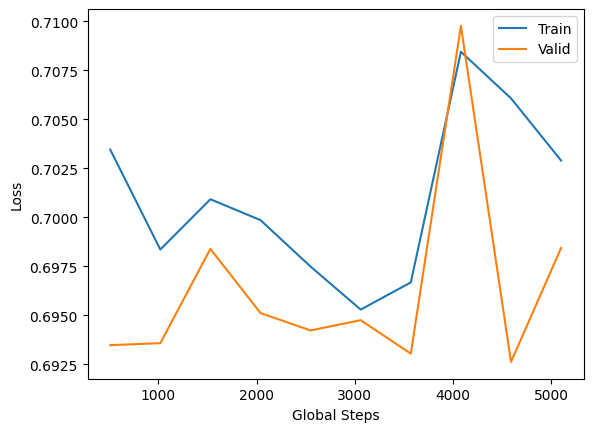

In [ ]:
# 10-49 오차 정보 그래프로 확인
train_loss_list, valid_loss_list, global_steps_list = load_metrics('/content/drive/MyDrive/Colab Notebooks/DLData/metrics.pt')
plt.plot(global_steps_list, train_loss_list, label='Train')
plt.plot(global_steps_list, valid_loss_list, label='Valid')
plt.xlabel('Global Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# 10-50 모델 평가 함수 정의
def evaluate(model, test_loader):
    y_pred = []
    y_true = []

    model.eval()  # 테스트 데이터셋으로 모델 평가
    with torch.no_grad():
        for text, label in test_loader:
            encoded_list = [tokenizer.encode(t, add_special_tokens=True) for t in text]
            padded_list =  [e + [0] * (512-len(e)) for e in encoded_list]

            sample = torch.tensor(padded_list)
            sample, label = sample.to(device), label.to(device)
            labels = torch.tensor(label)
            output = model(sample, labels=labels)

            _, output = output
            y_pred.extend(torch.argmax(output, 1).tolist())
            y_true.extend(labels.tolist())

    print('Classification 결과:')
    print(classification_report(y_true, y_pred, labels=[1,0], digits=4))

    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    ax= plt.subplot()
    import seaborn as sns
    sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")

    ax.set_title('Confusion Matrix')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.xaxis.set_ticklabels(['0', '1'])
    ax.yaxis.set_ticklabels(['0', '1'])

Model loaded from <== /content/drive/MyDrive/Colab Notebooks/DLData/model.pt
Classification 결과:
              precision    recall  f1-score   support

           1     0.5091    1.0000    0.6747       558
           0     0.0000    0.0000    0.0000       538

    accuracy                         0.5091      1096
   macro avg     0.2546    0.5000    0.3374      1096
weighted avg     0.2592    0.5091    0.3435      1096



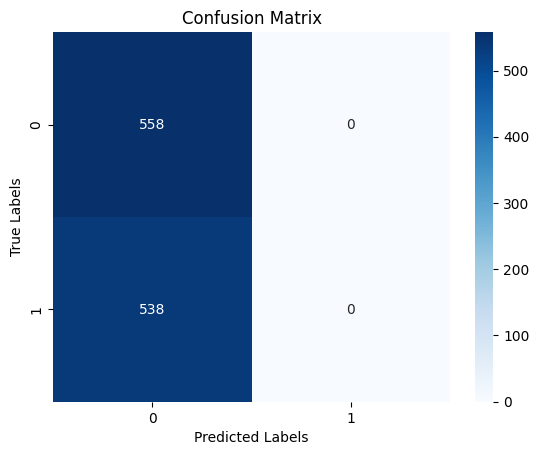

In [ ]:
# 10-51 모델 평가
import warnings
warnings.filterwarnings('ignore')
best_model = model.to(device)
load_checkpoint('/content/drive/MyDrive/Colab Notebooks/DLData/model.pt', best_model)
evaluate(best_model, test_loader)